<h1>Bicycle Sharing Demand</h1><hr>
<h2>Data Modelling(Linear Regression)</h2><hr>
<h3>Data Fields</h3>
     <h5><li>datetime - hourly date + timestamp</li>
     <li>season - 1 = spring, 2 = summer, 3 = fall, 4 = winter</li>
     <li>holiday - whether the day is considered a holiday</li>
     <li>workingday - whether the day is neither a weekend nor holiday</li>
         <li>weather</li>
             <ul>1. Clear, Few clouds, Partly cloudy, Partly cloudy</ul>
             <ul>2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</ul>
             <ul>3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</ul>
             <ul>4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</ul> 
     <li>temp - temperature in Celsius</li><br>
     <li>atemp - "feels like" temperature in Celsius</li>
     <li>humidity - relative humidity</li>
     <li>windspeed - wind speed</li>
     <li>casual - number of non-registered user rentals initiated</li>
     <li>registered - number of registered user rentals initiated</li>
     <li>count - number of total rentals (Dependent Variable)</li></h5>

In [77]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import matplotlib.pyplot as plt


<p>Lets Read In The Dataset


In [54]:
Bicycle = pd.read_csv("T.csv.csv")

<h2>Data Summary</h2>
    <p>As a first step lets do three simple steps on the dataset
        <li> 1. Size of the dataset.</li>
        <li> 2. Get a glimpse of data by printing few rows of it.</li>
        <li> 3. What type of variables contribute our data.</li></p>


In [55]:
#1.Size of the data
Bicycle.shape

(10886, 12)

In [61]:
#2.Sample Of First Few Rows
Bicycle.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [62]:
#3.Variables datatypes
Bicycle.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [64]:
#check Null values
Bicycle.isnull().values.any()


False

In [65]:
#Root Mean Squared Logarithmic Error
def rmsle(prediction, actual):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in prediction]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))


<h4>Correlation Analysis</h4>
<p>One common to understand how a dependent variable is influenced by features (numerical) is to find a correlation matrix between them. we then carried out correlation and correlation plot between the variables.</p><br>


In [58]:
Bicycle.corr(method="pearson")

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


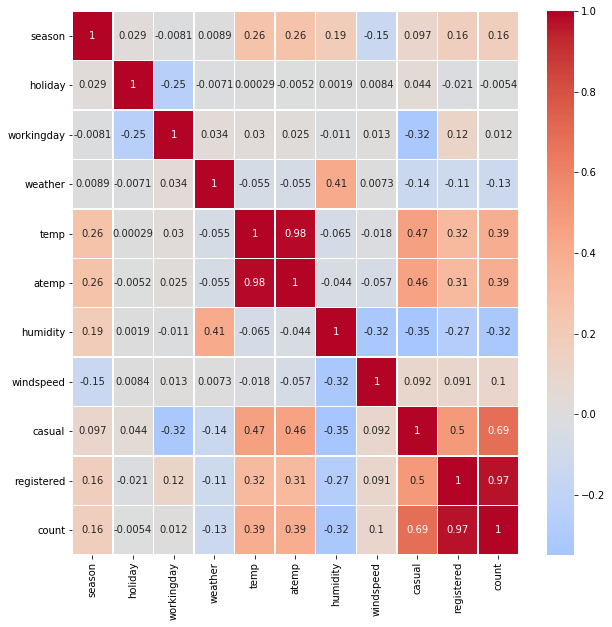

In [59]:
#correlation plot using sns.heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Bicycle.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

<h4>From the above correlation plot we can see that ;</h4>
 <li> 1. temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".</li>
 <li>2. windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"</li>
 <li>3. "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.</li>
 <li>4. "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.</li>


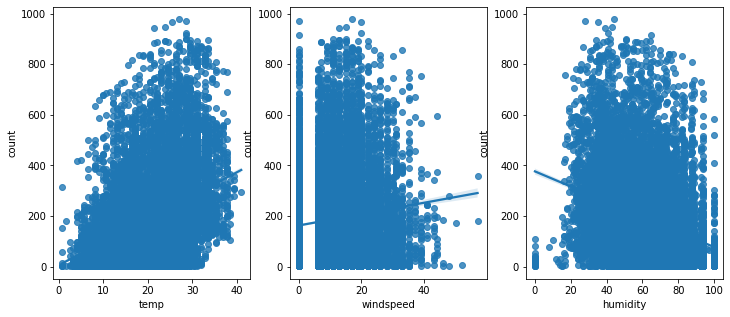

In [60]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=Bicycle,ax=ax1)
sn.regplot(x="windspeed", y="count", data=Bicycle,ax=ax2)
sn.regplot(x="humidity", y="count", data=Bicycle,ax=ax3)


<h3>Visualizing Distribution Of Data<h3>
<p>As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable.<br>

<h1>Linear Regression</h1>




In [71]:
#construct linear regression model
X = Bicycle.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

In [73]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,0,1,9.84,14.395,81,0.0
1,1,0,0,1,9.02,13.635,80,0.0
2,1,0,0,1,9.02,13.635,80,0.0
3,1,0,0,1,9.84,14.395,75,0.0
4,1,0,0,1,9.84,14.395,75,0.0


In [74]:
y=Bicycle["count"]

In [76]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [78]:
X.to_numpy()

array([[ 1.    ,  0.    ,  0.    , ..., 14.395 , 81.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 13.635 , 80.    ,  0.    ],
       [ 1.    ,  0.    ,  0.    , ..., 13.635 , 80.    ,  0.    ],
       ...,
       [ 4.    ,  0.    ,  1.    , ..., 15.91  , 61.    , 15.0013],
       [ 4.    ,  0.    ,  1.    , ..., 17.425 , 61.    ,  6.0032],
       [ 4.    ,  0.    ,  1.    , ..., 16.665 , 66.    ,  8.9981]])

In [79]:
y.to_numpy()

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [80]:
reg=LinearRegression()

In [82]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
w = reg.coef_

In [84]:
w

array([22.75882041, -9.15872365, -1.14953067,  5.93871831,  1.84736842,
        5.63120253, -3.05683516,  0.77761604])

In [88]:
b = reg.intercept_

In [89]:
y_ = reg.predict(X)


In [90]:
y_

array([ 16.12367993,  13.38595907,  13.38595907, ..., 172.15804766,
       173.69225257, 154.94240301])

In [92]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [94]:
reg.score(X,y)


0.2609124770087268